<a href="https://colab.research.google.com/github/jayabban/Data-Science/blob/main/CNN(CIFAR10)_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# **Importing Dataset**

Trainning samples are (50000) (32 x 32px) and rgb(3)

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

One Dimensional Array

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Reshaped to two dimensional array

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[9]

'truck'

In [8]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

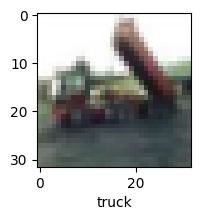

In [9]:
plot_sample(X_train, y_train, 2)

# **Normalising our Dataset **


In [10]:
X_train = X_train/255
X_test = X_test/255

Using artificial Neural Network

In [11]:
from tensorflow import keras
ann = keras.models.Sequential()


In [12]:
ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
ann.add(tf.keras.layers.Dense(3000, activation='relu'))
ann.add(tf.keras.layers.Dense(1000, activation='relu'))
ann.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [13]:
ann.compile(optimizer ='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 180s 113ms/step - loss: 1.8091 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 171s 110ms/step - loss: 1.6226 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 182s 116ms/step - loss: 1.5415 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.4827 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4302 - accuracy: 0.4961


In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 12s 36ms/step - loss: 1.4538 - accuracy: 0.4902


[1.4538160562515259, 0.490200012922287]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes =[np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 11s 36ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.43      0.52      1000
           1       0.55      0.72      0.62      1000
           2       0.35      0.44      0.39      1000
           3       0.32      0.47      0.38      1000
           4       0.41      0.44      0.42      1000
           5       0.40      0.35      0.37      1000
           6       0.56      0.48      0.52      1000
           7       0.62      0.47      0.54      1000
           8       0.64      0.61      0.63      1000
           9       0.61      0.49      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



# **Improving Performance with CNN**

In [17]:
from tensorflow import keras
cnn = keras.models.Sequential()

# **Convolution**

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))

# **Pooling**

In [19]:
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

# **Addind a second convolutional layer**

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))


# **Flattening**

In [21]:
cnn.add(tf.keras.layers.Flatten())

# **Full Connection**

In [22]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

# **Output Layer**

In [23]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# **Trainning the CNN**

### Compiling

In [24]:
cnn.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Trainning the CNN on the trainning set and evaluating it on the test set

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4569 - accuracy: 0.4761
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1031 - accuracy: 0.6176
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9683 - accuracy: 0.6633
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8873 - accuracy: 0.6928
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8158 - accuracy: 0.7173
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7663 - accuracy: 0.7361
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7153 - accuracy: 0.7517
Epoch 8/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6744 - accuracy: 0.7656
Epoch 9/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6317 - accuracy: 0.7804
Epoch 10/10
1563/1563 [==============================] - 77s 49m

In [26]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.8724 - accuracy: 0.7124


[0.8724304437637329, 0.7124000191688538]

2Dimensional

In [27]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

Converted to 1D

In [28]:
y_test = y_test.reshape(-1,)

Predicting

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[8.7044109e-04, 1.3839065e-04, 9.1580447e-04, 7.9806083e-01,
        1.9199956e-04, 1.9785112e-01, 6.7679334e-04, 1.1154930e-05,
        3.8963131e-05, 1.2444622e-03],
       [3.6732284e-03, 4.4725444e-03, 3.7143991e-06, 1.9376315e-05,
        2.8831016e-06, 2.1118664e-08, 4.7689537e-07, 5.0081567e-06,
        9.8974788e-01, 2.0748023e-03],
       [1.3278334e-01, 2.4255849e-01, 2.6271546e-03, 8.8243932e-03,
        1.2116102e-02, 2.6364638e-03, 7.8071898e-04, 1.4586412e-02,
        5.4672217e-01, 3.6364697e-02],
       [9.7987443e-01, 9.4986585e-04, 2.8080714e-03, 4.5419314e-05,
        8.0078660e-04, 2.4518886e-06, 2.6136587e-04, 1.8127951e-06,
        1.5015973e-02, 2.3986796e-04],
       [4.3739456e-06, 1.4548055e-05, 7.1194544e-02, 3.5638057e-02,
        3.5105768e-01, 3.5973010e-03, 5.3848326e-01, 6.5951649e-06,
        2.0682703e-06, 1.5561733e-06]], dtype=float32)

Argmax returns the index of the highes value eg np.argmax([5,12,1,2])
the output is 1 because 12 is the highest value at position 1 in the list

Using List comprehension

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

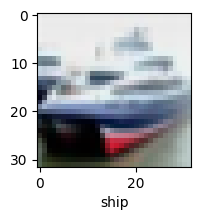

In [32]:
plot_sample(X_test, y_test, 1)

In [33]:
classes[y_classes[1]]

'ship'

# Confusion Matrix and report

In [34]:
print("classification Report: \n", classification_report(y_test,y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.81      0.83      0.82      1000
           2       0.66      0.54      0.60      1000
           3       0.51      0.56      0.54      1000
           4       0.64      0.70      0.67      1000
           5       0.58      0.67      0.62      1000
           6       0.81      0.75      0.78      1000
           7       0.78      0.73      0.76      1000
           8       0.82      0.82      0.82      1000
           9       0.81      0.78      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



# Accuracy: Total number of prediction had right
# Precision: Out of all the preiction how many you got right TP/(TP+FP)
# recall: How many of your prediction sample eg(dog) how many you had right TP/(TP+FN)
# f1-score:
# True Positive: No of correct predictions
# False Positive: No False predictions
# True Negative: false predicted to be true
# False Negative:True predicted to be false